# Importing the libraries to use there functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import PIL.ImageOps
import os

# This is the location of file where training and validation data is available in google drive

In [2]:
training_dir = "/content/sign_data/train/"
training_csv = "/content/sign_data/train_data.csv"
testing_csv = "/content/sign_data/test_data.csv"
testing_dir = "/content/sign_data/test/"
batch_size = 32
epochs = 20

## Mounting the google colab to google drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Using the kaggle API of personal kaggle account to load dataset

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

## Checking the current working directory

In [6]:
pwd

'/content'

## Loading the kaggle dataset into google colab

In [9]:
!kaggle datasets download -d robinreni/signature-verification-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/Kaggle. Or use the environment method.


In [ ]:
!ls

gdrive	sample_data  signature-verification-dataset.zip


## Unzipping the dataset folder which was downloaded into google colab

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  signature-verification-dataset.zip
  inflating: sign_data/sign_data/test/049/01_049.png  
  inflating: sign_data/sign_data/test/049/02_049.png  
  inflating: sign_data/sign_data/test/049/03_049.png  
  inflating: sign_data/sign_data/test/049/04_049.png  
  inflating: sign_data/sign_data/test/049/05_049.png  
  inflating: sign_data/sign_data/test/049/06_049.png  
  inflating: sign_data/sign_data/test/049/07_049.png  
  inflating: sign_data/sign_data/test/049/08_049.png  
  inflating: sign_data/sign_data/test/049/09_049.png  
  inflating: sign_data/sign_data/test/049/10_049.png  
  inflating: sign_data/sign_data/test/049/11_049.png  
  inflating: sign_data/sign_data/test/049/12_049.png  
  inflating: sign_data/sign_data/test/049_forg/01_0114049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0206049.PNG  
  inflating: sign_data/sign_data/test/049_forg/01_0210049.PNG  
  inflating: sign_data/sign_data/test/049_forg/02_0114049.PNG  
  inflating: sign_data/sign_data/test/0

In [ ]:
!ls

gdrive	sample_data  sign_data


# Reading the training CSV file and loading the top data of that dataset using pandas

In [ ]:
df_train=pd.read_csv('/content/sign_data/train_data.csv')
df_train.head()

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


# Reading the testing CSV file and loading the top data of that dataset using pandas

In [ ]:
df_test = pd.read_csv('/content/sign_data/test_data.csv')
df_test.head()#First column correct signature while second column contain fraud signature

,068/09_068.png,068_forg/03_0113068.PNG,1
0,068/09_068.png,068_forg/01_0124068.PNG,1
1,068/09_068.png,068_forg/02_0124068.PNG,1
2,068/09_068.png,068_forg/01_0113068.PNG,1
3,068/09_068.png,068_forg/04_0124068.PNG,1
4,068/09_068.png,068_forg/04_0113068.PNG,1


## Merging the two images of testing data Because for this network two imaage of data is given at same time for training

In [ ]:
import cv2
test_images1 = []
test_images2 = []
for j in range(0,len(df_test)):
    img1 = cv2.imread(testing_dir+df_test.iat[j,0])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (100, 100))
    test_images1.append(img1)
    
    img2 = cv2.imread(testing_dir+df_test.iat[j,1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img2, (100, 100))
    test_images2.append(img2)

test_images1 = np.array(test_images1)/255.0
test_images2 = np.array(test_images2)/255.0

# Merging the two images of training data Because for this network two imaage of data is given at same time for training

In [ ]:
import cv2

train_images1 = []
train_images2 = []
train_labels = []

for i in range(len(df_train)):
    img1 = cv2.imread(training_dir+df_train.iat[i,0])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (100, 100))
    train_images1.append(img1)
    
    img2 = cv2.imread(training_dir+df_train.iat[i,1])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2 = cv2.resize(img2, (100, 100))
    train_images2.append(img2)
    
    train_labels.append(df_train.iat[i,2])
    
train_images1 = np.array(train_images1)/255.0
train_images2 = np.array(train_images2)/255.0
train_labels = np.array(train_labels)

In [ ]:
train_images1 = np.expand_dims(train_images1, -1)
train_images2 = np.expand_dims(train_images2, -1)
test_images1 = np.expand_dims(test_images1, -1)
test_images2 = np.expand_dims(test_images2, -1)

# Calculating The Euclidean Distance Between Two Predicted image show that the result can be found out between two images

In [ ]:
from keras import backend as K
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
input_dim = (100,100,1) #Input dimension of image to loaded while training 

In [ ]:
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras import optimizers

from keras import callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
import os
from keras.models import Model,load_model
import json
from keras.models import model_from_json, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

# Model Architecture through which it will train 

In [ ]:
def build_base_network(input_shape):
    
    seq = Sequential()
    
    kernel_size = 3
    
    #convolutional layer 1
    seq.add(Convolution2D(64, (kernel_size, kernel_size), input_shape=input_shape))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2)))  
    seq.add(Dropout(.25))
    
    seq.add(Convolution2D(32, (kernel_size, kernel_size)))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2))) 
    seq.add(Dropout(.25))
    
    #convolutional layer 2
    seq.add(Convolution2D(32, (kernel_size, kernel_size)))
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2, 2))) 
    seq.add(Dropout(.25))

    #flatten 
    seq.add(Flatten())
    seq.add(Dense(128, activation='relu'))
    seq.add(Dropout(0.1))
    seq.add(Dense(50, activation='relu'))
    return seq

base_network = build_base_network(input_dim)

img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)

#converting this image data into tensor
feat_vecs_a = base_network(img_a)
feat_vecs_b = base_network(img_b)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

prediction = Dense(1,activation='sigmoid')(distance)

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

In [ ]:
model = Model([img_a, img_b],prediction)
model.summary() # This is the model summary for the above data 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 50)           444530      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           sequential[0][0]             

## Training the data using adam optimizer with a small learning rate=0.0001

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(lr=0.0001), metrics=["accuracy"])

## Two Images has been train and the difference between them is found out using eucldian distance and the model is train for 8 epochs and model has reached a good accuracy in very less amount of time

In [ ]:
history = model.fit([train_images1,train_images2], train_labels, validation_split=.10,
      batch_size= 32, verbose=1, epochs=8, callbacks=callback_early_stop_reduceLROnPlateau)

Epoch 1/8
653/653 [==============================] - 54s 31ms/step - loss: 0.7340 - accuracy: 0.4725 - val_loss: 0.6929 - val_accuracy: 0.5118
Epoch 2/8
653/653 [==============================] - 20s 30ms/step - loss: 0.6918 - accuracy: 0.5433 - val_loss: 0.6799 - val_accuracy: 0.6605
Epoch 3/8
653/653 [==============================] - 20s 30ms/step - loss: 0.5715 - accuracy: 0.7385 - val_loss: 0.4328 - val_accuracy: 0.9186
Epoch 4/8
653/653 [==============================] - 20s 30ms/step - loss: 0.4371 - accuracy: 0.8895 - val_loss: 0.3616 - val_accuracy: 0.9461
Epoch 5/8
653/653 [==============================] - 20s 30ms/step - loss: 0.3657 - accuracy: 0.9541 - val_loss: 0.3270 - val_accuracy: 0.9668
Epoch 6/8
653/653 [==============================] - 20s 30ms/step - loss: 0.3278 - accuracy: 0.9818 - val_loss: 0.3090 - val_accuracy: 0.9668
Epoch 7/8
653/653 [==============================] - 20s 30ms/step - loss: 0.3036 - accuracy: 0.9904 - val_loss: 0.2845 - val_accuracy: 0.9823

# Training Accuracy Vs Validation Accuracy &&&& Validation Loss Vs Training Loss is plot for each epoch

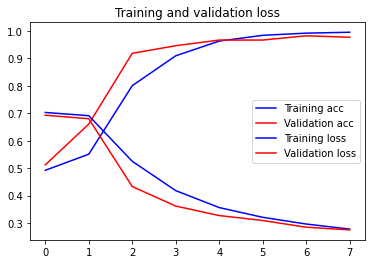

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

## The training model has to be predicted using test images 

In [ ]:
pred_y = model.predict([test_images1,test_images2])

In [ ]:
test_labels = np.array(df_test['1'])

# This is the Prediction for the test data which is predicted by the model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_y.argmax(axis=1), test_labels)

0.4823386114494519